In [1]:
import operator as op
import src.ea.ea_lib as ea
import src.ea.problem_data as pb
import src.ea.utilities as ut
import params as prm
import random as rd
import time
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from datetime import date
import pandas as pd
import statistics as stat

c:\Users\fredx\Documents\Gits\Generic_EA\src\ea\problem_data.py:38: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(path + "ionosphere.dat"
train_shape (175, 34)
test_shape (176, 34)
train_label_count {0: 63, 1: 112}
test_label_count {0: 63, 1: 113}


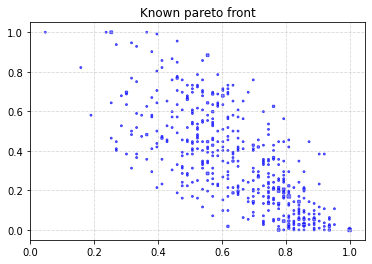

parent_index_mean 85.506
Removed parents: 81
first {'accuracy_in_label_0': 0.36507936507936506, 'accuracy_in_label_1': 1.0, 'semantic_peculiarity': 0.450085714285714, 'front': 1}
last {'accuracy_in_label_0': 0.4444444444444444, 'accuracy_in_label_1': 0.0625, 'semantic_peculiarity': 0.08010857142857143, 'front': 44}


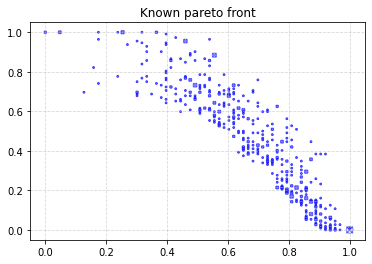

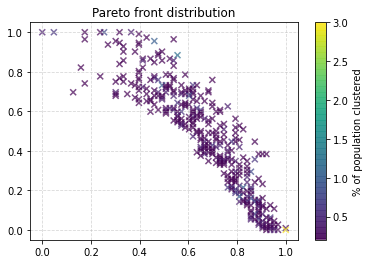

parent_index_mean 86.114
Removed parents: 87
first {'accuracy_in_label_0': 0.38095238095238093, 'accuracy_in_label_1': 1.0, 'semantic_peculiarity': 0.3964971428571427, 'front': 1}
last {'accuracy_in_label_0': 0.47619047619047616, 'accuracy_in_label_1': 0.10714285714285714, 'semantic_peculiarity': 0.09910857142857143, 'front': 33}


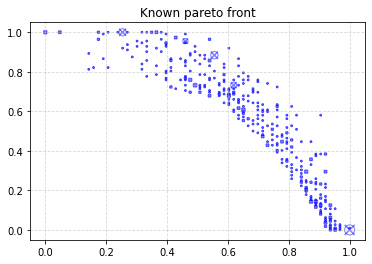

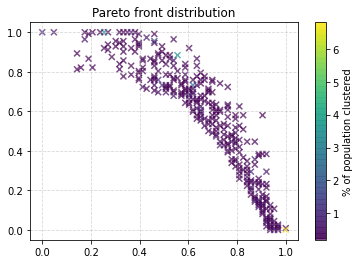

parent_index_mean 81.196
Removed parents: 99
first {'accuracy_in_label_0': 0.38095238095238093, 'accuracy_in_label_1': 1.0, 'semantic_peculiarity': 0.3552742857142857, 'front': 1}
last {'accuracy_in_label_0': 0.7142857142857143, 'accuracy_in_label_1': 0.0, 'semantic_peculiarity': 0.08440571428571428, 'front': 29}


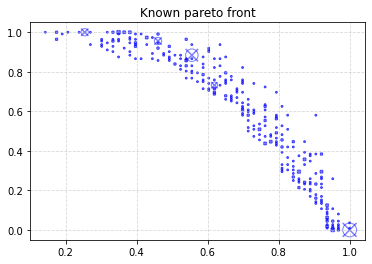

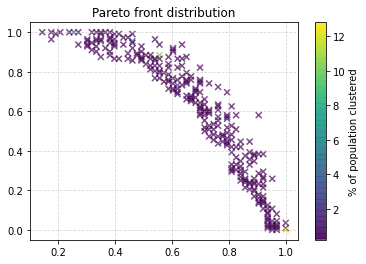

parent_index_mean 82.454
Removed parents: 101
first {'accuracy_in_label_0': 0.3968253968253968, 'accuracy_in_label_1': 1.0, 'semantic_peculiarity': 0.34676, 'front': 1}
last {'accuracy_in_label_0': 0.42857142857142855, 'accuracy_in_label_1': 0.017857142857142856, 'semantic_peculiarity': 0.06280000000000001, 'front': 30}


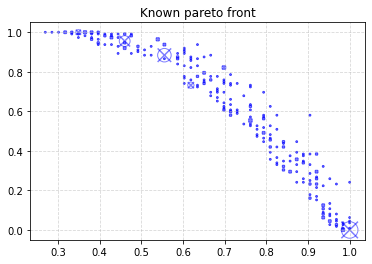

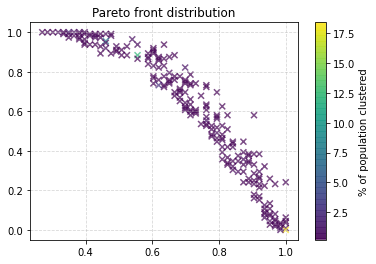

parent_index_mean 80.932
Removed parents: 87
first {'accuracy_in_label_0': 0.3968253968253968, 'accuracy_in_label_1': 1.0, 'semantic_peculiarity': 0.32779428571428587, 'front': 1}
last {'accuracy_in_label_0': 0.5396825396825397, 'accuracy_in_label_1': 0.044642857142857144, 'semantic_peculiarity': 0.0927085714285714, 'front': 33}


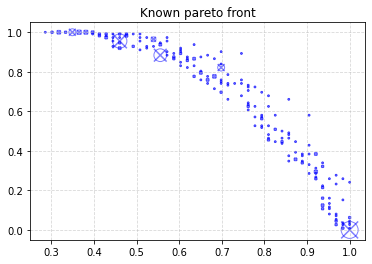

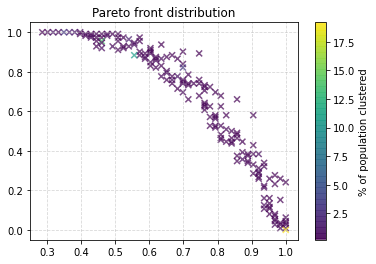

parent_index_mean 79.088
Removed parents: 75
first {'accuracy_in_label_0': 0.5873015873015873, 'accuracy_in_label_1': 0.9732142857142857, 'semantic_peculiarity': 0.31261714285714304, 'front': 1}
last {'accuracy_in_label_0': 0.6349206349206349, 'accuracy_in_label_1': 0.017857142857142856, 'semantic_peculiarity': 0.0873942857142857, 'front': 33}


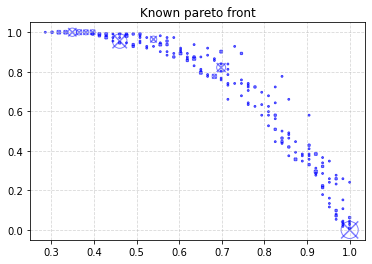

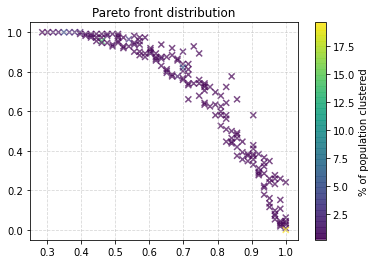

parent_index_mean 76.36
Removed parents: 80
first {'accuracy_in_label_0': 0.5873015873015873, 'accuracy_in_label_1': 0.9732142857142857, 'semantic_peculiarity': 0.3042057142857145, 'front': 1}
last {'accuracy_in_label_0': 0.7619047619047619, 'accuracy_in_label_1': 0.0, 'semantic_peculiarity': 0.10056, 'front': 27}


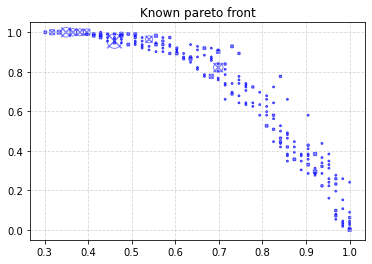

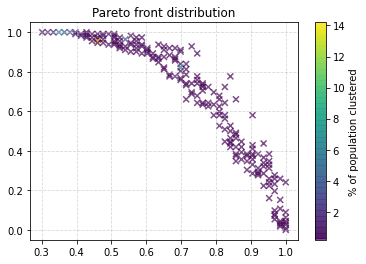

parent_index_mean 84.226
Removed parents: 77
first {'accuracy_in_label_0': 0.746031746031746, 'accuracy_in_label_1': 0.8928571428571429, 'semantic_peculiarity': 0.2541200000000001, 'front': 1}
last {'accuracy_in_label_0': 0.31746031746031744, 'accuracy_in_label_1': 0.17857142857142858, 'semantic_peculiarity': 0.09142285714285717, 'front': 31}


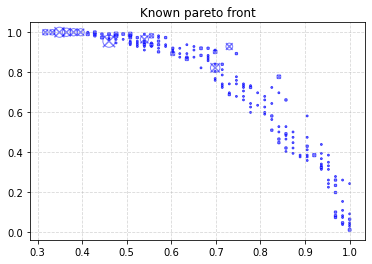

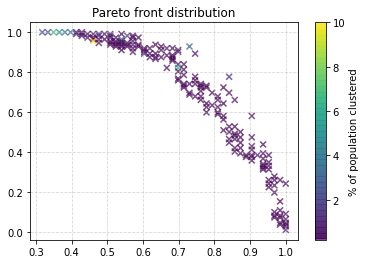

parent_index_mean 89.788
Removed parents: 91
first {'accuracy_in_label_0': 0.746031746031746, 'accuracy_in_label_1': 0.9196428571428571, 'semantic_peculiarity': 0.24684571428571425, 'front': 1}
last {'accuracy_in_label_0': 0.6190476190476191, 'accuracy_in_label_1': 0.008928571428571428, 'semantic_peculiarity': 0.0982457142857143, 'front': 28}


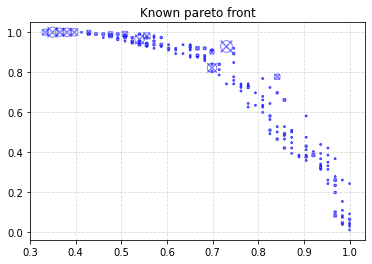

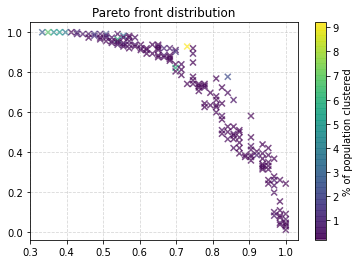

parent_index_mean 79.872
Removed parents: 112
first {'accuracy_in_label_0': 0.746031746031746, 'accuracy_in_label_1': 0.9196428571428571, 'semantic_peculiarity': 0.21614285714285703, 'front': 1}
last {'accuracy_in_label_0': 0.38095238095238093, 'accuracy_in_label_1': 0.125, 'semantic_peculiarity': 0.06822857142857143, 'front': 25}


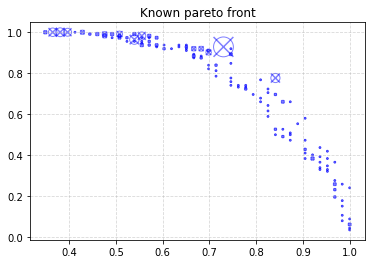

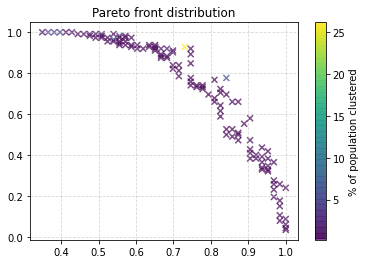

In [2]:

def evaluate_ind(ind, semantic_indexes, dataset, objectives, mapping_threshold):
    outputs = {}
    for i,data_row in enumerate(dataset.x_train):
        output_dict = ind.representation.evaluate(data_row = data_row)
        #Extracting the 0th index output gene
        output = output_dict[0]
        #The raw output needs to be transformed
        transformed_output = ut.threshold_map(value = output, threshold = mapping_threshold, output_up = dataset.labels[1], output_down = dataset.labels[0])
        outputs[i] = transformed_output
    #Each objective has its own evaluation method
    acc0 = ut.accuracy_in_label(y = dataset.y_train, y_output = outputs, label = dataset.labels[0])
    acc1 = ut.accuracy_in_label(y = dataset.y_train, y_output = outputs, label = dataset.labels[1])
    ind.update_evaluation(objective = objectives[0], value = acc0)
    ind.update_evaluation(objective = objectives[1], value = acc1)
    semantics = {i:outputs[i] for i in semantic_indexes}
    ind.update_semantics_all(semantics_all = semantics)
    #"""

def copy_evaluations(ind1, ind2, objectives):
    for obj in objectives:
        ind2.update_evaluation(obj, ind1.evaluations[obj.name])
    ind2.update_semantics_all(semantics_all = {k:v for k,v in ind1.semantics_all.items()})
    ind2.representation.evaluation_skipped = True

rd.seed(prm.random_seed)
now = datetime.now()
time_string = now.strftime(prm.timestamp_format)

for trial in range(prm.trials):

    #Setup
    output_path = os.path.join(*prm.output_path)
    output_path = os.path.join(output_path, str(trial))
    output_path = ut.verify_path(output_path)
    dataset = pb.Dataset()
    dataset.load_problem(name = prm.dataset_name)
    dataset.split_data(train_rate = prm.train_test_rate)
    dataset.print_dataset_details()
    n_semantic_indexes = int(dataset.x_train.shape[0]*prm.semantic_size_rate)
    semantic_indexes = set(rd.sample(list(range(dataset.x_train.shape[0])), k=n_semantic_indexes))

    #CGP
    cgp = ea.CGP_Representation(n_inputs = dataset.x_train.shape[1]
        ,n_outputs = prm.n_outputs
        ,levels_back = prm.levels_back
        ,n_rows = prm.n_rows
        ,n_columns = prm.n_columns
        ,allow_input_to_output = prm.allow_input_to_output
        ,inputs_available_to_all_columns = prm.allow_input_to_output
        ,functions = [op.add,op.sub,op.mul,ut.safe_divide_one])

    #Objectives
    #"""
    objectives = [] #Make a function in the ea_lib
    for obj_idx, obj_name in enumerate(prm.objective_names):
        if  obj_name == "accuracy_in_label":
            obj = ea.Objective(name = obj_name + "_" + str(dataset.labels[prm.accuracy_label_index[obj_idx]]), to_max = prm.objective_to_max[obj_idx], best = 1, worst = 0)
        elif obj_name == "accuracy":
            obj = ea.Objective(name = obj_name, to_max = True, best = 1, worst = 0)
        else:
            print("Wrong objective name")
        objectives.append(obj)

    generation_objective = ea.Objective(name = "generation", to_max = True)
    nsgaii_objectives = ea.get_nsgaii_objectives()
    front_objective = nsgaii_objectives[0]
    cd_objective = nsgaii_objectives[1]
    spea2_objective = ea.get_spea2_objective()
    sp_obj = ea.get_semantic_peculiarity_objective()

    #Initial population
    graphs = [cgp.create_random(seed = rd.random()) for _ in range(prm.population_size)]
    population = [ea.Individual(graphs[i], created_in_gen = 0) for i in range(prm.population_size)]
    for ind in population:
        evaluate_ind(ind, semantic_indexes, dataset, objectives, prm.numeric_output_mapping_threshold)
    ea.semantic_peculiarity(population = population, output_vector = dataset.y_train, semantic_indexes = semantic_indexes, sp_objective = sp_obj, b = prm.semantic_peculiarity_b)
    #ea.set_ranks(population = population, conflicting_objectives = objectives, front_objective = front_objective)
    #population = ea.sort_population(population = population, objectives=[front_objective, sp_obj])
    #population = ea.fast_nondominated_sort(population, objectives, nsgaii_objectives)
    population = ea.spea2_sort(population, objectives, spea2_objective)
    ea.plot_pareto(population, objectives, cluster_type = "size")

    #EA
    for generation in range(prm.generations):
        archive_population = []
        parent_indexes = []
        for i in range(prm.population_size):
            parent_index = ea.tournament_selection_index(population_size=prm.population_size, tournament_size=prm.tournament_size)
            parent_indexes.append(parent_index)
            parent = population[parent_index]
            #offspring = ea.Individual(cgp.single_active_mutation(parent.representation), created_in_gen=generation, parent_index = parent_index)
            #evaluate_ind(offspring, semantic_indexes, dataset, objectives, prm.numeric_output_mapping_threshold)
            #"""
            new_graph, altered = cgp.point_mutation(parent.representation, prm.point_mutation_percentage)
            offspring = ea.Individual(new_graph, created_in_gen=generation, parent_index = parent_index)
            if altered:
                evaluate_ind(offspring, semantic_indexes, dataset, objectives, prm.numeric_output_mapping_threshold)
            else:
                copy_evaluations(parent, offspring, objectives)
            #"""
            archive_population.append(offspring)    
        print("parent_index_mean",stat.mean(parent_indexes))
        population = population + archive_population
        ea.semantic_peculiarity(population = population, output_vector = dataset.y_train, semantic_indexes = semantic_indexes, sp_objective = sp_obj, b = prm.semantic_peculiarity_b)
        
        #Remove parent if the offspring shares the pareto vector and the semantic peculiarity
        removable_parents_indexes = []
        for offspring in archive_population:
            if ea.inds_same_by_evals(offspring, population[offspring.parent_index], objectives = [objectives[0], objectives[1], sp_obj]):
                removable_parents_indexes.append(offspring.parent_index)
        removable_parents_indexes = list(set(removable_parents_indexes))
        removable_parents_indexes.sort(reverse=True)
        for parent_index in removable_parents_indexes:
            del population[parent_index]
        print("Removed parents:", len(removable_parents_indexes))
        
        
        #ea.set_ranks(population = population, conflicting_objectives = objectives, front_objective = front_objective)
        #population = ea.sort_population(population = population, objectives=[front_objective, sp_obj])
        #population = ea.fast_nondominated_sort(population, objectives, nsgaii_objectives)
        population = ea.spea2_sort(population, objectives, spea2_objective)
        print("first",population[0].evaluations)
        print("last",population[-1].evaluations)
        population = population[:prm.population_size]
        ea.plot_pareto(population, objectives, cluster_type = "size")
        ea.plot_pareto(population, objectives, cluster_type = "color")



In [104]:
#for i in range(50):
#    print(population[i].evaluations)
parent_index = ea.tournament_selection_index(population_size=prm.population_size, tournament_size=prm.population_size-10)
print(parent_index)

0


In [13]:
#Semantic peculiarity test

#Logs params
now = datetime.now()
time_string = now.strftime('%Y_%m_%d-%H_%M_%S')
output_path = os.path.join("outputs","semantic_peculiarity", time_string, "")
output_path = ut.verify_path(output_path)

# Dataset
rd.seed(0)
dataset = pb.Dataset()
dataset.load_problem(name = "even_parity5")

## CGP definition
cgp = ea.CGP_Representation(
            n_inputs = dataset.x_train.shape[1]
            ,n_outputs = 1
            ,levels_back = 100
            ,n_rows = 1
            ,n_columns = 100
            ,allow_input_to_output = True
            ,inputs_available_to_all_columns = True
            ,functions = [op.add,op.sub,op.mul,ut.safe_divide_one])

# Semantic definition
semantic_indexes = list(range(dataset.x_train.shape[0]))

# Objectives
sp_obj = ea.get_semantic_peculiarity_objective(name = "sp")
acc_obj = ea.Objective(name="acc", to_max = True, best=1, worst=0)

# Evaluation
def evaluate_ind(ind, dataset, obj, mapping_threshold=0):
    outputs = {}
    for i,data_row in enumerate(dataset.x_train):
        output_dict = ind.representation.evaluate(data_row = data_row)
        #Extracting the output from the 0th output gene
        output = output_dict[0]
        #Mapping the numerical output
        mapped_output = ut.threshold_map(value = output, threshold = mapping_threshold, output_up = dataset.labels[1], output_down = dataset.labels[0])
        outputs[i] = mapped_output
    #Each objective has its own evaluation method
    ind.update_semantics_all(semantics_all = outputs)
    acc = ut.accuracy(y = dataset.y_train, y_output = outputs)
    ind.update_evaluation(objective = obj, value = acc)


# Experiment
pop_size = 100
graphs = [cgp.create_random(seed = rd.random()) for _ in range(pop_size)]
population = [ea.Individual(graphs[i], created_in_gen = 0) for i in range(pop_size)]

for ind in population:
    evaluate_ind(ind, dataset, acc_obj)

semantic_peculiarity, semantic_relevance, represented_fs = ea.semantic_peculiarity(population, dataset.y_train, semantic_indexes, sp_obj, 1)
#population = ea.sort_population(population, [sp_obj])
for ind_idx, ind in enumerate(population):
    print(str(represented_fs[ind_idx]), ind.evaluations)
print("semantic_relevance")
for i, sr in enumerate(semantic_relevance.values()):
    print(i, sr)
names = list(population[0].evaluations.keys())
v1 = np.array([ind.evaluations[names[0]] for ind in population])
v2 = np.array([ind.evaluations[names[1]] for ind in population])
print(str(np.corrcoef(v1, v2)))

[1, 3, 4, 6, 8, 10, 13, 15, 16, 18, 21, 23, 25, 27, 28, 30] {'acc': 0.5, 'sp': 0.2471875}
[1, 3, 4, 6, 8, 11, 13, 14, 19, 20, 21, 22, 25, 26, 28, 31] {'acc': 0.5, 'sp': 0.24531249999999993}
[0, 1, 3, 6, 10, 12, 13, 15, 18, 20, 21, 23, 24, 25, 27, 30] {'acc': 0.5, 'sp': 0.26249999999999996}
[0, 3, 5, 6, 9, 10, 12, 15, 17, 18, 20, 23, 24, 27, 29, 30] {'acc': 0.5, 'sp': 0.26875}
[0, 1, 6, 7, 10, 12, 13, 15, 18, 19, 20, 21, 25, 28, 30, 31] {'acc': 0.5, 'sp': 0.259375}
[1, 2, 4, 7, 8, 11, 13, 14, 16, 21, 22, 23, 25, 26, 27, 28] {'acc': 0.5, 'sp': 0.23374999999999996}
[4, 6, 7, 8, 10, 11, 16, 17, 18, 19, 25, 30, 31] {'acc': 0.40625, 'sp': 0.20093750000000005}
[1, 2, 4, 7, 8, 11, 12, 14, 16, 19, 21, 22, 25, 26, 29, 31] {'acc': 0.5, 'sp': 0.2340625}
[1, 3, 5, 6, 8, 10, 12, 15, 16, 19, 20, 23, 25, 26, 29, 30] {'acc': 0.5, 'sp': 0.24656250000000002}
[1, 2, 4, 7, 8, 11, 13, 14, 16, 19, 21, 22, 25, 26, 28, 31] {'acc': 0.5, 'sp': 0.23312499999999997}
[1, 2, 4, 7, 8, 11, 13, 14, 16, 19, 21, 25, 26, 

In [4]:
#EXPERIMENT 1: 

## CGP params
levels_back = 400
n_rows = 1
n_columns = 400
n_outputs = 1
allow_input_to_output = True
inputs_available_to_all_columns = True
functions = [op.add,op.sub,op.mul,ut.safe_divide_one]
functions_as_string = "[op.add,op.sub,op.mul,ut.safe_divide_one]"

## MOEA params
trials = 30
seed = 0
node_max_evals = 100000000
population_size = 200
tournament_size = 5
mutation_percentage = 9

moea_sorting_method = "SPEA2"
#moea_sorting_methods: NSGAII, SPEA2

problem_name = "ion"
#problem_names = ion, spect, yst_m3, yst_mit

#Objectives
objectives = [
    ea.Objective(name="acc0", to_max = True, best=1, worst=0),
    ea.Objective(name="acc1", to_max = True, best=1, worst=0)
    ]
generation_objective = ea.Objective(name="generation", to_max = True)
nsgaii_objectives = ea.get_nsgaii_objectives()
front_objective = nsgaii_objectives[0]
cd_objective = nsgaii_objectives[1]
spea2_objective = ea.get_spea2_objective()


## Experiment parameters
rd.seed(seed)
now = datetime.now()
time_string = now.strftime('%Y_%m_%d-%H_%M_%S')
output_path = os.path.join("outputs",moea_sorting_method +"_cgp-" + problem_name + "-" + time_string, "")

#Instantiation
dataset = pb.Dataset()
dataset.load_problem(name = problem_name)
dataset.split_data(train_rate = 0.5)
data_rows = dataset.x_train.shape[0]
cgp = ea.CGP_Representation(
            n_inputs = dataset.x_train.shape[1]
            ,n_outputs = n_outputs
            ,levels_back = levels_back
            ,n_rows = n_rows 
            ,n_columns = n_columns
            ,allow_input_to_output = allow_input_to_output
            ,inputs_available_to_all_columns = inputs_available_to_all_columns
            ,functions=functions)
labels = list(set(dataset.y_train))

#Save parameters for reference
param_logs = [["rd.seed" , seed]
            ,["node_max_evals", node_max_evals]
            ,["population_size ", population_size]
            ,["tournament_size ", tournament_size]
            ,["mutation_percentage ", mutation_percentage]
            ,["levels_back ", levels_back]
            ,["n_rows ", n_rows]
            ,["n_columns ", n_columns]
            ,["n_outputs ", n_outputs]
            ,["allow_input_to_output ", allow_input_to_output]
            ,["inputs_available_to_all_columns ", inputs_available_to_all_columns]
            ,["functions ", functions_as_string]
            ,["moea_sorting_method", moea_sorting_method]]
#ut.logs_to_file(param_logs, "param_logs", output_path)

def evaluate_ind(ind):
    """
    Evaluate the individual with acc0 and acc1
    """
    outputs = {}
    for i,data_row in enumerate(dataset.x_train):
        output_dict = ind.representation.evaluate(data_row = data_row)
        #Extracting the 0th index output gene
        output = output_dict[0]
        #The raw output needs to be transformed
        #transformed_output = ut.custom_round(output)
        transformed_output = ut.threshold_map(value = output,threshold = 0.5, output_up = labels[1], output_down = labels[0])
        outputs[i] = transformed_output
    #Each objective has its own evaluation method
    acc0 = ut.accuracy_in_label(y = dataset.y_train, y_output = outputs, label = 0)
    acc1 = ut.accuracy_in_label(y = dataset.y_train, y_output = outputs, label = 1)
    ind.update_evaluation(objective = objectives[0], value = acc0)
    ind.update_evaluation(objective = objectives[1], value = acc1)
    ind.update_semantics_all(semantics_all = outputs)


def sort_pop_moea(population):
    if moea_sorting_method == "NSGAII":
        s_population = ea.fast_nondominated_sort(population = population, conflicting_objectives = objectives, nsgaii_objectives = nsgaii_objectives)
    elif moea_sorting_method == "SPEA2":
        s_population = ea.spea2_sort(population = population, conflicting_objectives = objectives, spea2_objective = spea2_objective)
    else:
        print("Wrong sorting method")
    return s_population



#Generation
def run_gen(population, current_gen):

    start_t = time.time()

    #Sort the population.
    sorted_population = sort_pop_moea(population)

    #Logs (for previous gen)
    hyperarea = ea.hyperarea(population, objectives)
    header, logs, g_header, g_logs = ea.get_cgp_log(sorted_population, cgp, current_gen)
    g_logs += [hyperarea]
    g_header += ["Hyperarea"]

    #Elitism
    parent_population = sorted_population[:population_size]

    #Offspring generation
    offspring_population = []
    for i in range(population_size):
        parent_index = ea.tournament_selection_index(population_size = len(parent_population), tournament_size = tournament_size)
        parent = parent_population[parent_index]
        new_graph, active_altered = cgp.point_mutation(graph = parent.representation, percentage = mutation_percentage)
        offspring = ea.Individual(representation = new_graph, created_in_gen = current_gen)

        #If the active graph was not altered, the individual does not need to be evaluated again:
        if active_altered:
            evaluate_ind(offspring)
        else:
            offspring.representation.evaluation_skipped = True
            for objective in objectives:
                offspring.update_evaluation(objective = objective, value = parent.evaluations[objective.name])
            offspring.update_semantics_all(semantics_all = parent.semantics_all)
        offspring_population.append(offspring)

    #Update the gen_of_creation of the offsprings
    for offspring in offspring_population:
        offspring.update_evaluation(objective = generation_objective, value = current_gen)

    #Formation of the population for the next gen
    population = offspring_population + parent_population

    return population, header, logs, g_header, g_logs

c:\Users\fredx\Documents\Gits\Generic_EA\src\ea\problem_data.py:38: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(path + "ionosphere.dat"


In [2]:
#Semantics experiment

#Methods
def evaluate_ind(ind, dataset, objective):
    """
    Evaluate the individual with acc0 and acc1
    """
    outputs = {}
    for i,data_row in enumerate(dataset.x_train):
        output_dict = ind.representation.evaluate(data_row = data_row)
        #Extracting the 0th index output gene
        output = output_dict[0]
        #The raw output need to be transformed
        #transformed_output = ut.custom_round(output)
        mapped_output = ut.threshold_map(value = output,threshold = mapping_threshold, output_up = dataset.labels[1], output_down = dataset.labels[0])
        outputs[i] = mapped_output
    #Each objective has its own evaluation method
    ind.update_semantics_all(semantics_all = outputs)
    acc = ut.accuracy(y = dataset.y_train, y_output = outputs)
    ind.update_evaluation(objective = acc_obj, value = acc)


## Experiment parameters
generations = 5000
problem_name = "ion"
#problem_names = ion, spect, yst_m3, yst_mit
seed = 0
rd.seed(seed)
now = datetime.now()
time_string = now.strftime('%Y_%m_%d-%H_%M_%S')
mapping_threshold = 0
output_path = os.path.join("outputs","semantic_distances","point9",problem_name + "-" + time_string, "") #define
output_path = ut.verify_path(output_path)

#Initialize the logs
sem_logs = pd.DataFrame()
final_log = pd.DataFrame()

#Loop
for i in range(4):

    ## CGP params
    levels_back = 200 + i*50
    n_rows = 1
    n_columns = 200 + i*50
    n_outputs = 1
    allow_input_to_output = True
    inputs_available_to_all_columns = True
    functions = [op.add,op.sub,op.mul,ut.safe_divide_one]
    functions_as_string = "[op.add,op.sub,op.mul,ut.safe_divide_one]"
    mutation_percentage = 9

    #Instantiation
    acc_obj = ea.Objective(name="acc", to_max = True, best=1, worst=0, eval_function = ut.accuracy)
    tpr_obj = ea.Objective(name="tpr", to_max = True, best=1, worst=0, eval_function = ut.accuracy_in_label)
    tnr_obj = ea.Objective(name="tnr", to_max = True, best=1, worst=0, eval_function = ut.accuracy_in_label)
    dataset = pb.Dataset()
    dataset.load_problem(name = problem_name)
    data_rows = dataset.x_train.shape[0]
    semantic_indexes = list(range(data_rows))
    cgp = ea.CGP_Representation(
                dataset.x_train.shape[1]
                ,n_outputs
                ,levels_back
                ,n_rows 
                ,n_columns
                ,allow_input_to_output
                ,inputs_available_to_all_columns
                ,*functions)

    #Initial random ind
    graph = cgp.create_random(seed = rd.random())
    ind = ea.Individual(graph, created_in_gen = 0)
    evaluate_ind(ind, dataset, acc_obj)

    start_time = time.time()
    for gen in range(generations):

        ##Generate the new ind
        #new_graph = cgp.single_active_mutation(ind.representation)
        #altered=True
        #new_graph, muts = cgp.accummulating_mutation(ind.representation, mutation_percentage)
        new_graph, altered = cgp.point_mutation(ind.representation, mutation_percentage) #point
        new_ind = ea.Individual(new_graph, created_in_gen = 0)
        evaluate_ind(new_ind, dataset, acc_obj)

        #Logs
        row = {
            "max_nodes":cgp.n_function_nodes
            ,"prev_actives":len(ind.representation.active_genotype)
            ,"new_actives":len(new_ind.representation.active_genotype)
            ,"actives_change":len(new_ind.representation.active_genotype) - len(ind.representation.active_genotype)
            ,"prev_actives_rate":len(ind.representation.active_genotype) / cgp.n_function_nodes
            ,"new_actives_rate":len(new_ind.representation.active_genotype) / cgp.n_function_nodes
            ,"actives_change_rate":(len(new_ind.representation.active_genotype) - len(ind.representation.active_genotype))/cgp.n_function_nodes
            ,"semantic_distance":ea.semantic_distance(ind, new_ind, semantic_indexes)
            ,"altered":altered
            }
        sem_logs = sem_logs.append(row, ignore_index = True)

        #Reset variables for the loop to work
        ind = new_ind

    total_time = time.time() - start_time

    #Extract the subsets from the logs
    current_logs = sem_logs[sem_logs["max_nodes"]==cgp.n_function_nodes]
    sd_when_altered = list(current_logs.loc[current_logs["altered"]==True,"semantic_distance"]) #point

    #Calculations
    avg_sd = stat.mean(list(current_logs["semantic_distance"]))
    stdev_sd = stat.stdev(list(current_logs["semantic_distance"]))
    avg_actives = stat.mean(list(current_logs["prev_actives"]))
    altered_rate = sum(list(current_logs["altered"]))/generations
    if len(sd_when_altered) > 0:
        avg_sd_when_altered = stat.mean(sd_when_altered)
        stdev_sd_when_altered = stat.stdev(sd_when_altered)
    else:
        avg_sd_when_altered = 0
        stdev_sd_when_altered = 0
    f_l = {"avg_sd":avg_sd
            ,"stdev_sd":stdev_sd
            ,"avg_actives":avg_actives
            ,"generations":generations
            ,"total_time":total_time
            ,"avg_gen_time":total_time/generations
            ,"rd.seed":seed
            ,"levels_back ":levels_back
            ,"n_rows ":n_rows
            ,"n_columns ":n_columns
            ,"n_outputs ":n_outputs
            ,"n_inputs":cgp.n_inputs
            ,"functions ":functions_as_string
            ,"fitness_cases":len(dataset.y_train)
            ,"mutation_percentage ": mutation_percentage
            ,"altered_rate":altered_rate
            ,"avg_sd_when_altered":avg_sd_when_altered
            ,"stdev_sd_when_altered":stdev_sd_when_altered
            }
    final_log = final_log.append(f_l, ignore_index = True)
    print(str(f_l))

sem_logs.to_csv(os.path.join(output_path, "Sem_logs"))
final_log.to_csv(os.path.join(output_path, "Exp_logs"))
    


c:\Users\fredx\Documents\Gits\Generic_EA\src\ea\problem_data.py:23: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(path + "ionosphere.dat"
{'avg_sd': 0.2374017094017094, 'stdev_sd': 0.22594902522170418, 'avg_actives': 5.5764, 'generations': 5000, 'total_time': 199.04613208770752, 'avg_gen_time': 0.039809226417541504, 'rd.seed': 0, 'levels_back ': 200, 'n_rows ': 1, 'n_columns ': 200, 'n_outputs ': 1, 'n_inputs': 34, 'functions ': '[op.add,op.sub,op.mul,ut.safe_divide_one]', 'fitness_cases': 351, 'mutation_percentage ': 9, 'altered_rate': 0.6392, 'avg_sd_when_altered': 0.3714044264732625, 'stdev_sd_when_altered': 0.1734771762710499}
c:\Users\fredx\Documents\Gits\Generic_EA\src\ea\problem_data.py:23: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [5]:

for exp_idx in range(trials):
    print("run:", str(exp_idx+1))
    #path = output_path + "run" + str(exp_idx) + "/"
    path = os.path.join(output_path + "run" + str(exp_idx), "")

    
    #Initial generation
    generation = 0
    individual_level_logs = []
    gen_level_logs = []
    nodes_evaluated = 0

    #Random initial population. Specific initial conditions for the population can be specified here
    graphs = [cgp.create_random(seed = rd.random()) for _ in range(population_size)]

    #create instances of Individual to be grouped in the population
    parent_population = [ea.Individual(r, created_in_gen = generation) for r in graphs]

    #Evaluate and sort the population according to non-domination
    for ind in parent_population:
        evaluate_ind(ind)
    first_sorted_population = sort_pop_moea(parent_population)

    #Create the offsprings of the initial generation
    population = parent_population
    for i in range(population_size):

        #Binary tournament selection is used in the initial generation only according to NSGA-II. The offspring is evaluated and added to the population
        parent_index = ea.tournament_selection_index(population_size = population_size, tournament_size = 2)
        parent = first_sorted_population[parent_index]
        new_graph, active_altered = cgp.point_mutation(graph = parent.representation, percentage = mutation_percentage)
        offspring = ea.Individual(representation = new_graph, created_in_gen = generation)

        #If the active graph was not altered, the individual does not need to be evaluated again:
        if active_altered:
            evaluate_ind(offspring)
        else:
            offspring.representation.evaluation_skipped = True
            for objective in objectives:
                offspring.update_evaluation(objective = objective, value = parent.evaluations[objective.name])
            offspring.update_semantics_all(semantics_all = parent.semantics_all)
        population.append(offspring)

    for ind in population:
        ind.update_evaluation(objective = generation_objective, value = generation)



    #Main loop
    while True:
        generation += 1
        population, header, logs, g_header, g_logs = run_gen(population, generation)
        

        #Logs
        individual_level_logs += logs
        gen_level_logs += [g_logs]

        #Plots
        if generation%20==0:
            
            ea.plot_pareto(population, objectives, "size", path = path, name = "plt_size_g"+str(generation))
            ea.plot_pareto(population, objectives, "color", path = path, name = "plt_color_g"+str(generation))

            ut.logs_to_file(individual_level_logs, "Ind_logs", path)
            ut.logs_to_file(gen_level_logs, "Gen_logs", path)
        
        #stop_criteria:
        nodes_idx = g_header.index("Eval_nodes")
        nodes_evaluated += g_logs[nodes_idx] * data_rows
        print("progress: ", str(nodes_evaluated*100/node_max_evals), " nodes_evaluated: ", str(nodes_evaluated))
        if nodes_evaluated > node_max_evals:
            break



    #Final plots
    population = sort_pop_moea(population)

    ea.plot_pareto(population, objectives, "size", path = path, name = "plt_size_g"+str(generation))
    ea.plot_pareto(population, objectives, "color", path = path, name = "plt_color_g"+str(generation))

    individual_level_logs.insert(0, header)
    ut.logs_to_file(individual_level_logs, "Ind_logs", path)
    gen_level_logs.insert(0, g_header)
    ut.logs_to_file(gen_level_logs, "Gen_logs", path)
#pickle

run: 1
progress:  1.473849  nodes_evaluated:  1473849
progress:  2.16567  nodes_evaluated:  2165670
progress:  2.712528  nodes_evaluated:  2712528
progress:  3.44331  nodes_evaluated:  3443310
progress:  4.247451  nodes_evaluated:  4247451
progress:  4.950855  nodes_evaluated:  4950855
progress:  5.792904  nodes_evaluated:  5792904
progress:  6.462261  nodes_evaluated:  6462261
progress:  7.268508  nodes_evaluated:  7268508
progress:  7.897149  nodes_evaluated:  7897149
progress:  8.443656  nodes_evaluated:  8443656
progress:  9.054045  nodes_evaluated:  9054045
progress:  9.599499  nodes_evaluated:  9599499
progress:  10.241829  nodes_evaluated:  10241829
progress:  10.730772  nodes_evaluated:  10730772
progress:  11.34783  nodes_evaluated:  11347830
progress:  11.933298  nodes_evaluated:  11933298
progress:  12.481911  nodes_evaluated:  12481911
progress:  12.924522  nodes_evaluated:  12924522
progress:  13.409604  nodes_evaluated:  13409604
progress:  13.860639  nodes_evaluated:  13

KeyboardInterrupt: 

In [4]:
print(population[0].representation)

Graph:
  (A)22 f0 i 15 7
  (_)23 f3 i 22 18
  (_)24 f0 i 11 7
  (_)25 f0 i 6 16
  (_)26 f3 i 4 20
  (_)27 f3 i 21 8
  (_)28 f2 i 25 15
  (A)29 f0 i 20 22
  (_)30 f1 i 14 13
  (A)31 f2 i 8 13
  (_)32 f2 i 20 6
  (_)33 f3 i 12 12
  (_)34 f1 i 6 22
  (_)35 f0 i 28 30
  (A)36 f3 i 10 29
  (A)37 f2 i 21 31
  (_)38 f3 i 6 24
  (_)39 f3 i 24 20
  (_)40 f2 i 9 1
  (_)41 f2 i 40 9
  (_)42 f0 i 5 1
  (_)43 f0 i 24 1
  (_)44 f1 i 26 39
  (_)45 f2 i 34 17
  (_)46 f0 i 4 29
  (_)47 f2 i 27 38
  (_)48 f1 i 29 20
  (A)49 f1 i 37 36
  (_)50 f3 i 17 43
  (_)51 f3 i 14 30
  (_)52 f1 i 49 14
  (_)53 f1 i 29 46
  (_)54 f3 i 3 31
  (_)55 f0 i 52 28
  (_)56 f1 i 44 5
  (_)57 f2 i 45 20
  (_)58 f2 i 36 29
  (_)59 f2 i 32 21
  (_)60 f3 i 14 23
  (_)61 f3 i 60 17
  (_)62 f0 i 24 7
  (_)63 f3 i 7 48
  (_)64 f2 i 9 10
  (_)65 f0 i 32 49
  (_)66 f1 i 6 49
  (_)67 f3 i 39 7
  (_)68 f2 i 4 49
  (_)69 f1 i 2 32
  (_)70 f2 i 4 63
  (_)71 f1 i 23 21
  (_)72 f1 i 10 70
  (_)73 f2 i 2 57
  (_)74 f2 i 13 61
  (_)75 f1 i 

In [17]:
import operator as op
import src.ea.ea_lib as ea
import src.ea.problem_data as pb
import src.ea.utilities as ut
import random as rd
import time
import numpy as np
import matplotlib.pyplot as plt

### Evolution strategy - vanilla CGP
rd.seed(1)
generations = 20000
population_size = 4
mutation_percentage = 9
problem_name = "ion"
objective = ea.Objective(name="acc", to_max = True, best=1, worst=0)
generation_objective = ea.Objective(name="generation", to_max = True)

#Setup
dataset = pb.Dataset()
dataset.load_problem(name = problem_name)

## CGP params
levels_back = 2
n_rows = 4
n_columns = 9
allow_input_to_output = False
inputs_available_to_all_columns = False
functions = [op.add,op.sub,op.mul,ut.safe_divide_one]

## Definition
dataset = pb.Dataset()
dataset.load_problem(name = problem_name)
cgp = ea.CGP_Representation(
            dataset.x_train.shape[1]
            ,1
            ,levels_back
            ,n_rows 
            ,n_columns
            ,allow_input_to_output
            ,inputs_available_to_all_columns
            ,*functions)
labels = list(set(dataset.y_train))

In [18]:
def evaluate_ind(ind):
    outputs = {}
    for i,data_row in enumerate(dataset.x_train):
        output_dict = ind.representation.evaluate(data_row = data_row)
        #Extracting the 0th index output gene
        output = output_dict[0]
        #The raw output needs to be transformed
        #transformed_output = ut.custom_round(output)
        transformed_output = ut.threshold_map(value = output,threshold = 0.5, output_up = labels[1], output_down = labels[0])
        outputs[i] = transformed_output
    #Each objective has its own evaluation method
    acc = ut.accuracy(y = dataset.y_train, y_output = outputs)
    ind.update_evaluation(objective, value = acc)
    ind.update_semantics_all(semantics_all = outputs)

def evaluate_population(population):
    for ind in population:
        evaluate_ind(ind)


In [19]:
### Evolution strategy - vanilla CGP

#Random initial population. Specific initial conditions for the population can be specified here
graphs = [cgp.create_random(seed = rd.random()) for _ in range(population_size)]

#create instances of Individual to be grouped in the population
population = [ea.Individual(r) for r in graphs]

#Evaluate and sort the population according to non-domination
evaluate_population(population)
for ind in population:
    ind.update_evaluation(objective = generation_objective, value = 0)
        

gen  0  acc  0.6217228464419475 actives  1
gen  500  acc  0.7565543071161048 actives  3
gen  1000  acc  0.7565543071161048 actives  4
gen  1500  acc  0.7640449438202247 actives  5
gen  2000  acc  0.7677902621722846 actives  5
gen  2500  acc  0.7677902621722846 actives  5
gen  3000  acc  0.7677902621722846 actives  5
gen  3500  acc  0.7752808988764045 actives  6
gen  4000  acc  0.7752808988764045 actives  6
gen  4500  acc  0.7752808988764045 actives  6
gen  5000  acc  0.7752808988764045 actives  6
gen  5500  acc  0.7865168539325843 actives  7
gen  6000  acc  0.7865168539325843 actives  7
gen  6500  acc  0.7865168539325843 actives  7
gen  7000  acc  0.7865168539325843 actives  7
gen  7500  acc  0.7865168539325843 actives  7
gen  8000  acc  0.7865168539325843 actives  7
gen  8500  acc  0.7940074906367042 actives  10
gen  9000  acc  0.7940074906367042 actives  10
gen  9500  acc  0.8052434456928839 actives  10
gen  10000  acc  0.8052434456928839 actives  10
gen  10500  acc  0.80524344569288

In [ ]:
for generation in range(generations):
    sorted_population = ea.sort_population(population,[objective, generation_objective])
    parent = sorted_population[0]
    population = [parent]

    #Create the offsprings of the initial generation
    for i in range(population_size-1):
        new_graph, active_altered = cgp.point_mutation(graph = parent.representation, percentage = mutation_percentage)
        offspring = ea.Individual(representation = new_graph)
        offspring.update_evaluation(objective = generation_objective, value = generation+1)

        #If the active graph was not altered, the individual does not need to be evaluated again:
        if active_altered:
            evaluate_ind(offspring)
        else:
            offspring.representation.evaluation_skipped = True
            offspring.update_evaluation(objective = objective, value = parent.evaluations[objective.name])
            offspring.update_semantics_all(semantics_all = parent.semantics_all)
        
        #add offspring to the population
        population.append(offspring)

    if generation%500==0:
        print("gen ", generation
        , " acc ", str(parent.evaluations[objective.name])
        , "actives ", str(len(parent.representation.active_genotype)))
        #print(parent.representation)
